<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Машинное обучение и майнинг данных"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# Занятие 6. Задача восстановления регрессии. Обучение без учителя

### Практика. Кластеризация данных с акселерометров и гироскопов мобильных телефонов

**Считываем <a href="https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones">данные</a> Samsung Human Activity Recognition.**

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = np.vstack((np.loadtxt("../../data/samsung_train.txt"), 
        np.loadtxt("../../data/samsung_test.txt")))

y = np.hstack((np.loadtxt("../../data/samsung_train_labels.txt"), 
        np.loadtxt("../../data/samsung_test_labels.txt"))).astype(int)

**Опеределим число уникальных значений меток целевого класса. Эти метки соответствуют ходьбе, подъему вверх по лестнице, спуску по лестнице, сидению, стоянию и лежанию. [Описание](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names)**

In [3]:
k = len(np.unique(y))
k

6

**Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить 90% дисперсии.**

In [4]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

X = PCA(0.9).fit_transform(scale(X))
X.shape

(10299, 65)

**Визуализируем данные в проекции на первые две главные компоненты.**

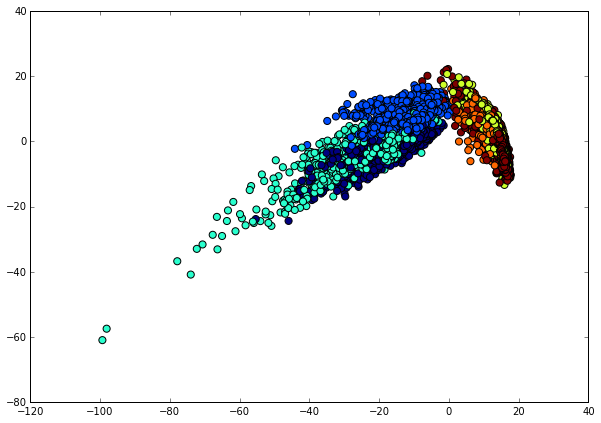

In [6]:
figure(figsize=(10, 7))
scatter(X[:, 0], X[:, 1], c=y, s=50)

**Визуализируем данные (с выделенными 65 главными компонентами) с помощью t-SNE. Это занимает несколько минут (алгоритм имеет квадратичную по числу объектов сложность).**

In [5]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=321)
tsne_representation = tsne.fit_transform(X)

CPU times: user 5min 6s, sys: 1min 19s, total: 6min 26s
Wall time: 5min 46s


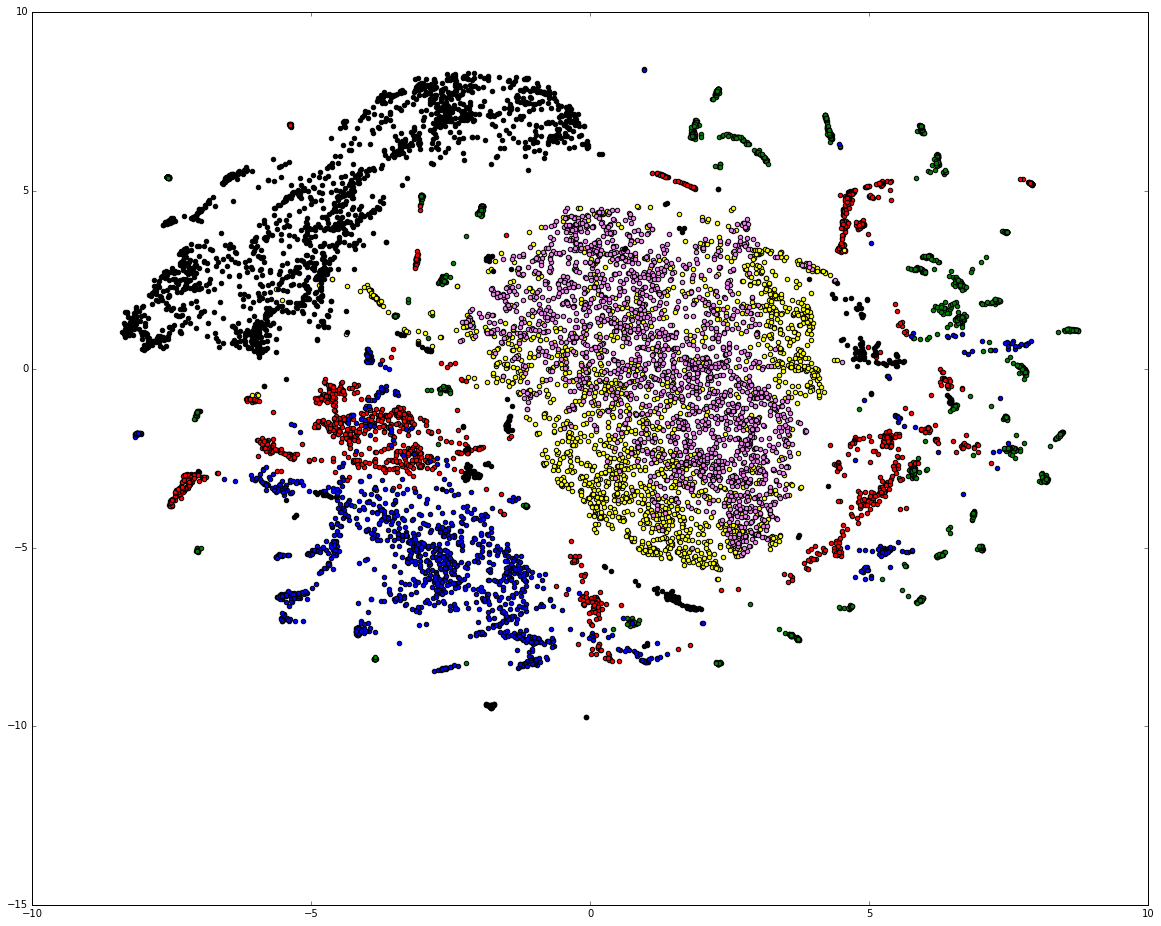

In [6]:
figsize(20,16)
for (activity, color) in zip(np.unique(y), ['green', 'red', 'blue', 'yellow', 'violet', 'black']):
    scatter(tsne_representation[np.where(y == activity)[0], 0], 
            tsne_representation[np.where(y == activity)[0], 1], c=color)

**Сделайте кластеризацию данных методом KMeans. Задайте параметр *n_clusters*, равный *k* - найденному ранее числу уникальных меток целевого класса.**

In [ ]:
predictions = KMeans # Ваш код здесь

**Посмотрите на соответствие между метками кластеров и исходными метками классов.**

In [ ]:
from pandas import crosstab

crosstab # Ваш код здесь

**Посчитайте метрики качества кластеризации ARI, AMI, гомогенность, полноту и силуэт**

In [ ]:
from sklearn import metrics

print('ARI =', # Ваш код здесь
print('AMI =', # Ваш код здесь
print('Homogeneity =', # Ваш код здесь
print('Completeness =', # Ваш код здесь
print('V-measure =', # Ваш код здесь
print('Silhouette =', # Ваш код здесь